In [1]:
#### IMPORTING ALL THE NECESSARY AND REQUIRED LIBRARIES
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_excel('Stroke-Death-Probability.xlsx')
data.head(3)

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,27,Probability of death,195,Namibia,1,Male,8,15-19 years,494,Stroke,8,Probability of death,2014,0.000118,NaN,NaN
1,27,Probability of death,195,Namibia,2,Female,8,15-19 years,494,Stroke,8,Probability of death,2014,0.000054,NaN,NaN
2,27,Probability of death,195,Namibia,1,Male,9,20-24 years,494,Stroke,8,Probability of death,2014,0.000128,NaN,NaN


In [3]:
# Describe the DataFrame and display it neatly
display(data.describe())

,measure_id,location_id,sex_id,age_id,cause_id,metric_id,year,val,upper,lower
count,360.0,360.0,360.000000,360.000000,360.0,360.0,360.000000,360.000000,0.0,0.0
mean,27.0,195.0,1.500000,30.500000,494.0,8.0,2016.500000,0.059491,NaN,NaN
std,0.0,0.0,0.500696,50.411399,0.0,0.0,2.876279,0.139575,NaN,NaN
min,27.0,195.0,1.000000,8.000000,494.0,8.0,2012.000000,0.000045,NaN,NaN
25%,27.0,195.0,1.000000,12.000000,494.0,8.0,2014.000000,0.000231,NaN,NaN
50%,27.0,195.0,1.500000,16.500000,494.0,8.0,2016.500000,0.005938,NaN,NaN
75%,27.0,195.0,2.000000,30.000000,494.0,8.0,2019.000000,0.056492,NaN,NaN
max,27.0,195.0,2.000000,235.000000,494.0,8.0,2021.000000,1.328734,NaN,NaN


In [4]:
# Drop the all the unnecessary columns or feature
data_cleaned = data.drop(columns=['upper', 'lower', 'measure_id', 'location_id', 'sex_id', 'age_id', 'cause_id',
                                  'metric_id', 'location_name', 'cause_name'])

# Display the first few rows of the modified DataFrame to verify
data_cleaned.head(3)

,measure_name,sex_name,age_name,metric_name,year,val
0,Probability of death,Male,15-19 years,Probability of death,2014,0.000118
1,Probability of death,Female,15-19 years,Probability of death,2014,0.000054
2,Probability of death,Male,20-24 years,Probability of death,2014,0.000128


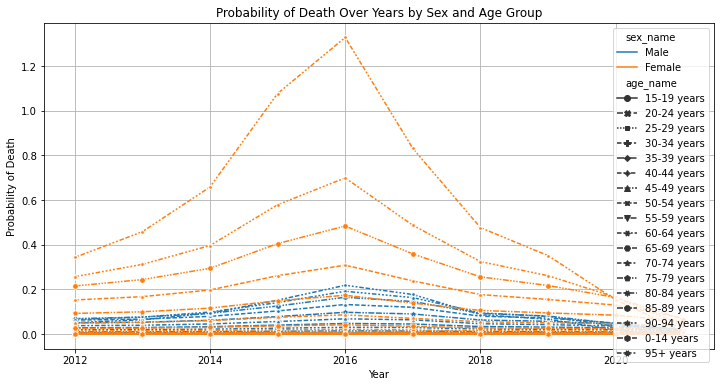

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_cleaned, x='year', y='val', hue='sex_name', style='age_name', markers=True)
plt.title('Probability of Death Over Years by Sex and Age Group')
plt.xlabel('Year')
plt.ylabel('Probability of Death')
plt.grid()
plt.show()


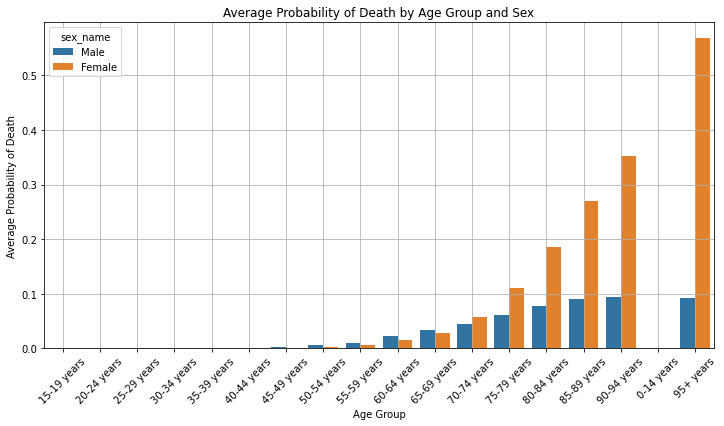

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data_cleaned, x='age_name', y='val', hue='sex_name', ci=None)
plt.title('Average Probability of Death by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Average Probability of Death')
plt.xticks(rotation=45)
plt.grid()
plt.show()

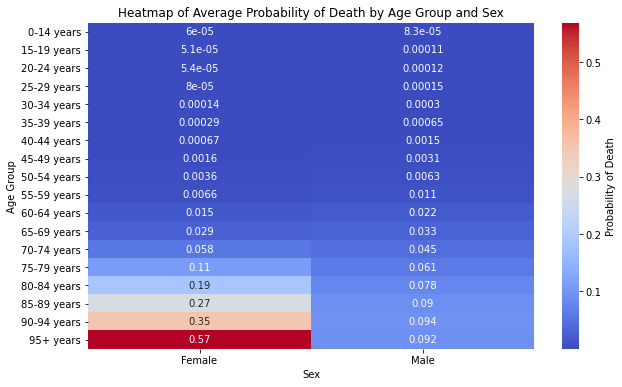

In [7]:
pivot_table = data_cleaned.pivot_table(values='val', index='age_name', columns='sex_name', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar_kws={'label': 'Probability of Death'})
plt.title('Heatmap of Average Probability of Death by Age Group and Sex')
plt.xlabel('Sex')
plt.ylabel('Age Group')
plt.show()

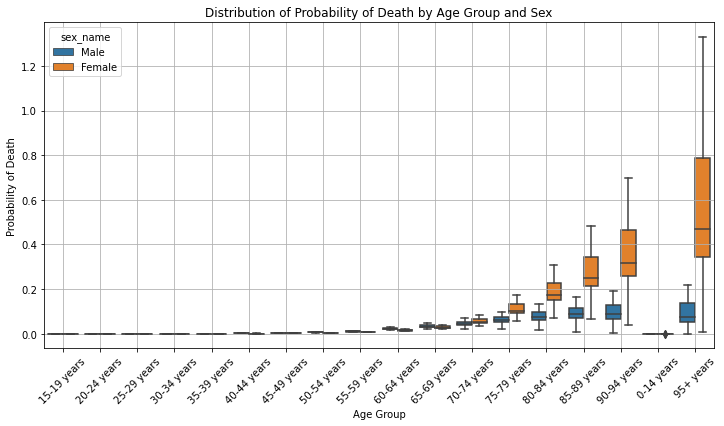

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned, x='age_name', y='val', hue='sex_name')
plt.title('Distribution of Probability of Death by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Probability of Death')
plt.xticks(rotation=45)
plt.grid()
plt.show()

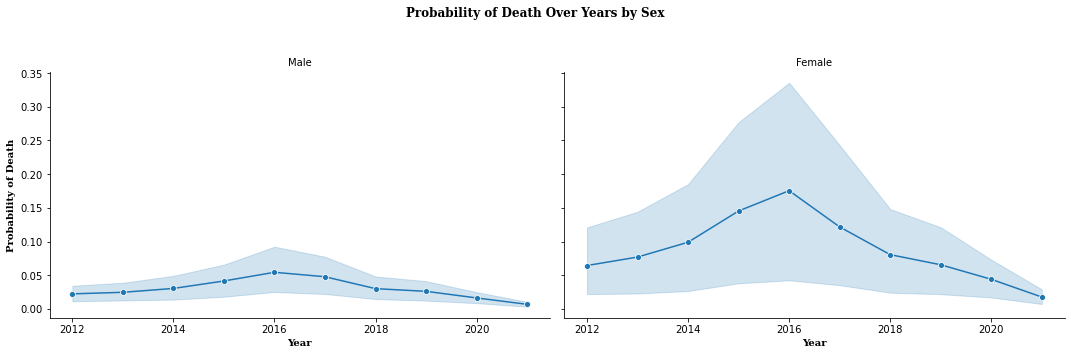

In [6]:
g = sns.FacetGrid(data_cleaned, col='sex_name', height=5, aspect=1.5)
g.map(sns.lineplot, 'year', 'val', marker='o')
g.set_axis_labels('Year', 'Probability of Death', fontsize=10, fontfamily='serif', fontweight='bold')
g.set_titles(col_template='{col_name}')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Probability of Death Over Years by Sex', fontsize=12, fontfamily='serif', fontweight='bold')
plt.show()

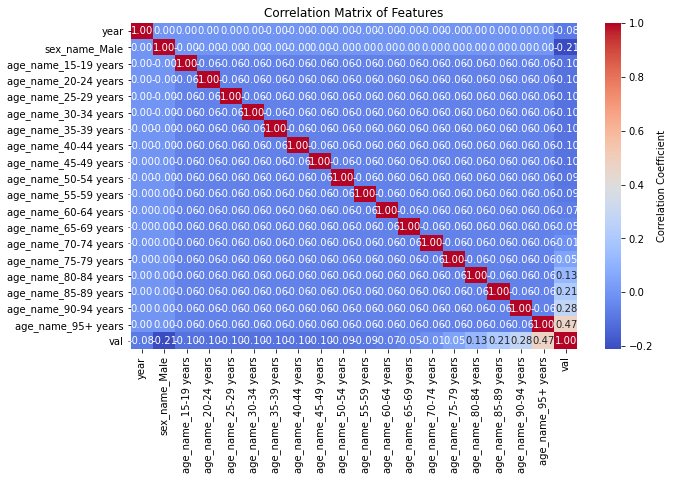

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# One-hot encode categorical variables
data_encoded = pd.get_dummies(data_cleaned[['sex_name', 'age_name', 'metric_name', 'year']], drop_first=True)
data_encoded['val'] = data_cleaned['val']

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Features')
plt.show()


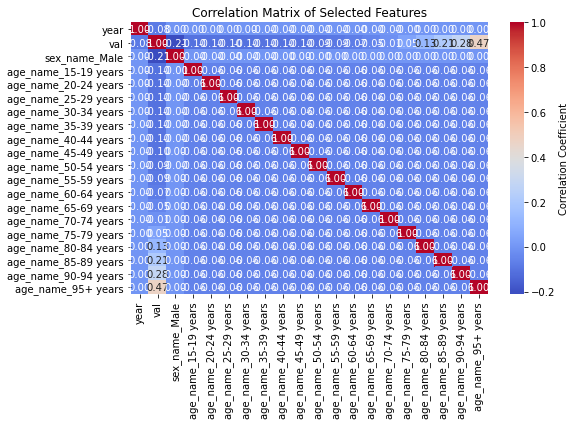

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation
data_subset = data_cleaned[['sex_name', 'age_name', 'year', 'val']]

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data_subset, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Selected Features')
plt.show()


In [7]:
# Group by age_name and sex_name and calculate mean probability
age_sex_group_data = data.groupby(['age_name', 'sex_name'])['val'].mean().reset_index()

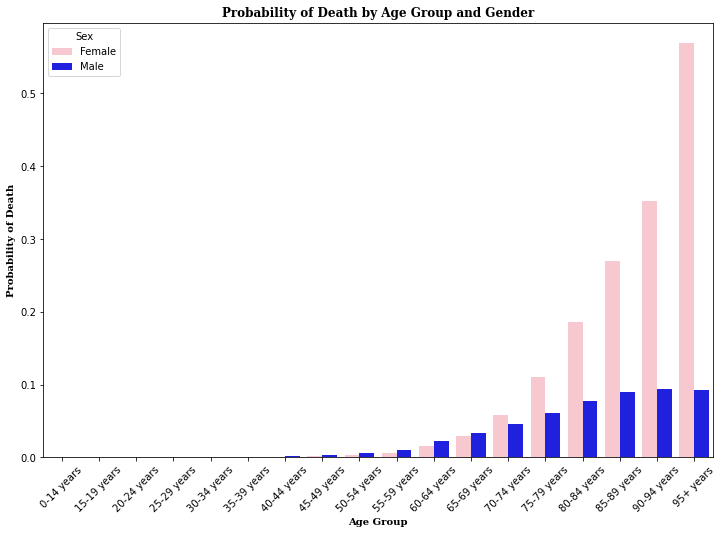

In [8]:
# Plot Probability of Death by Age Group and Gender
plt.figure(figsize=(12, 8))
sns.barplot(x='age_name', y='val', hue='sex_name', data=age_sex_group_data, palette=['pink', 'blue'])
plt.xlabel('Age Group', fontsize=10, fontfamily='serif', fontweight='bold')
plt.ylabel('Probability of Death', fontsize=10, fontfamily='serif', fontweight='bold')
plt.title('Probability of Death by Age Group and Gender', fontsize=12, fontfamily='serif', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()

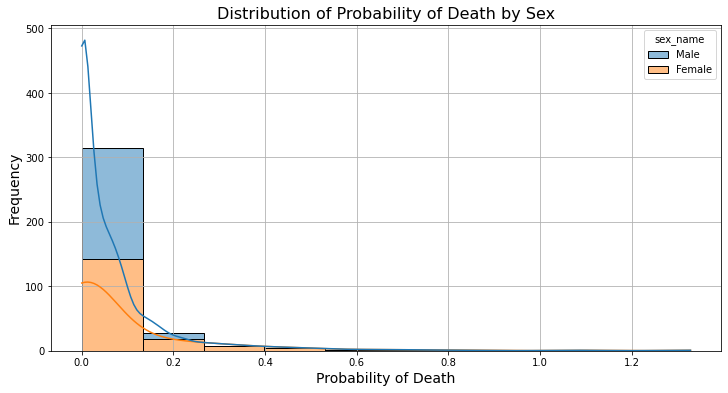

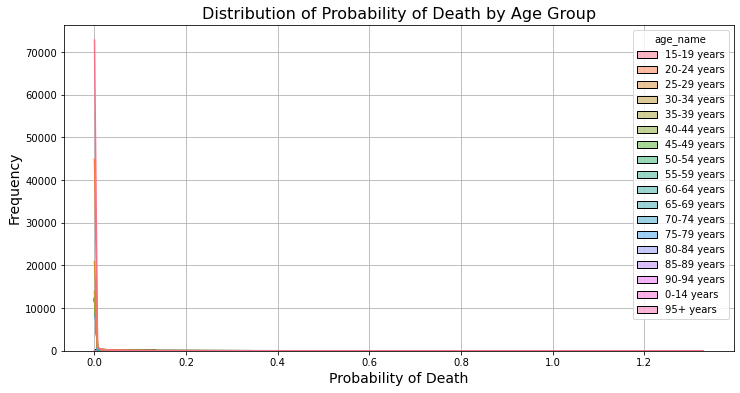

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of 'val' by 'sex_name'
plt.figure(figsize=(12, 6))

# Histogram for each sex
sns.histplot(data=data_cleaned, x='val', hue='sex_name', multiple='stack', kde=True, bins=10)
plt.title('Distribution of Probability of Death by Sex', fontsize=16)
plt.xlabel('Probability of Death', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()

# Plotting the distribution of 'val' by 'age_name'
plt.figure(figsize=(12, 6))

# Histogram for each age group
sns.histplot(data=data_cleaned, x='val', hue='age_name', multiple='stack', kde=True, bins=10)
plt.title('Distribution of Probability of Death by Age Group', fontsize=16)
plt.xlabel('Probability of Death', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()


In [9]:
############################ RANDOM FOREST

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
# Encode categorical variables
le_sex = LabelEncoder()
data_cleaned['sex_name'] = le_sex.fit_transform(data_cleaned['sex_name'])

In [12]:
# Function to calculate midpoint of age range, handling "95+ years"
def age_midpoint(age_range):
    # Handle the "95+ years" case
    if "+" in age_range:
        return 95  # Return 95 for "95+ years"
    else:
        # Split the age range by '-' to extract the lower and upper bounds
        age_bounds = age_range.split('-')
        # Calculate the midpoint of the age group
        midpoint = (int(age_bounds[0]) + int(age_bounds[1].split()[0])) // 2
        return midpoint

# Apply the function to the 'age_name' column
data_cleaned['age_name'] = data_cleaned['age_name'].apply(age_midpoint)

# Now the 'age_name' column will have numerical values representing the midpoints


In [13]:
# Define X (features) and y (target)
X = data_cleaned[['sex_name', 'age_name', 'year']]
y = data_cleaned['val']

In [14]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train a Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
# Make predictions
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [18]:
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}')

MAE: 0.005138683209794911, MSE: 0.00027780472249506306, RMSE: 0.016667474988583696, R²: 0.9771430691590144


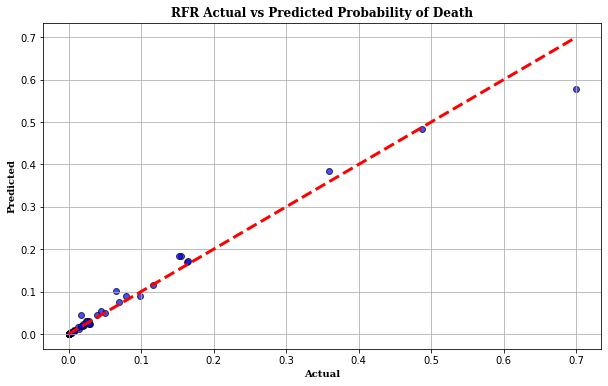

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual', fontsize=10, fontweight='bold', fontfamily='serif')
plt.ylabel('Predicted', fontsize=10, fontweight='bold', fontfamily='serif')
plt.title('RFR Actual vs Predicted Probability of Death', fontsize=12, fontweight='bold', fontfamily='serif')
plt.grid(True)
plt.show()

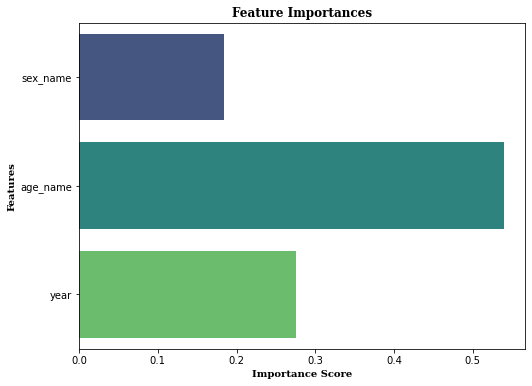

In [64]:
# Feature Importances plot
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importances', fontsize=12, fontweight='bold', fontfamily='serif')
plt.xlabel('Importance Score', fontsize=10, fontweight='bold', fontfamily='serif')
plt.ylabel('Features', fontsize=10, fontweight='bold', fontfamily='serif')
plt.show()


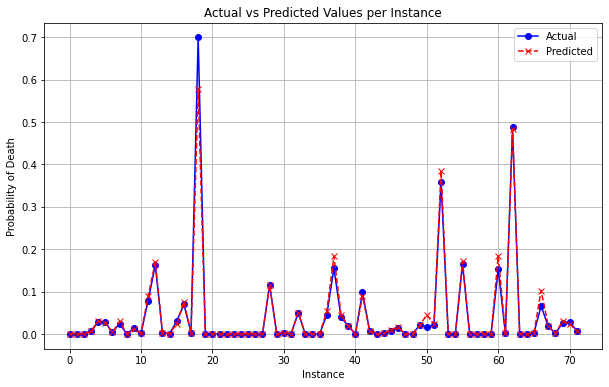

In [20]:
import numpy as np

# Create a dataframe for actual and predicted values
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Reset the index to have a common x-axis (instance number)
results = results.reset_index(drop=True)

# Plot the actual vs predicted per instance
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results.index, results['Predicted'], label='Predicted', marker='x', linestyle='--', color='red')
plt.xlabel('Instance')
plt.ylabel('Probability of Death')
plt.title('Actual vs Predicted Values per Instance')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
################################ EXPLORING THE OTHERS

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
###########  DECISION TREES

In [24]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluation
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt ** 0.5
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Regressor: MAE: {mae_dt}, MSE: {mse_dt}, RMSE: {rmse_dt}, R²: {r2_dt}')


Decision Tree Regressor: MAE: 0.0072090500579588684, MSE: 0.0005675149400322294, RMSE: 0.02382257207003957, R²: 0.9533065902586545


In [25]:
####################### GRADIENT BOOSTING

In [26]:
# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)

# Evaluation
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = mse_gbr ** 0.5
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting Regressor: MAE: {mae_gbr}, MSE: {mse_gbr}, RMSE: {rmse_gbr}, R²: {r2_gbr}')


Gradient Boosting Regressor: MAE: 0.007044735730191706, MSE: 0.0004650833899407733, RMSE: 0.021565792124120395, R²: 0.9617343478408423


In [27]:
################################################ XGBOOSTING

In [28]:
# XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost Regressor: MAE: {mae_xgb}, MSE: {mse_xgb}, RMSE: {rmse_xgb}, R²: {r2_xgb}')


XGBoost Regressor: MAE: 0.0030694764142760933, MSE: 0.000125503088811191, RMSE: 0.011202816110746038, R²: 0.9896739861168543


In [29]:
########################## ACTUAL VS pREDICTED 

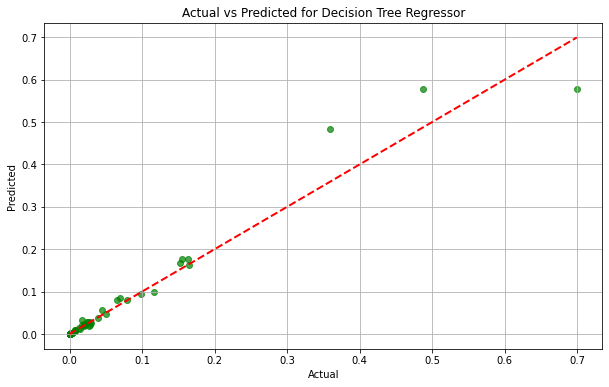

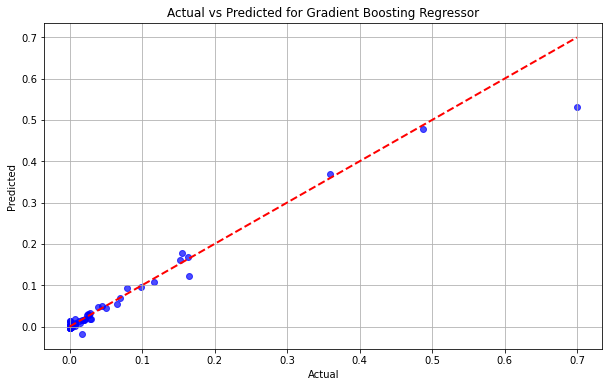

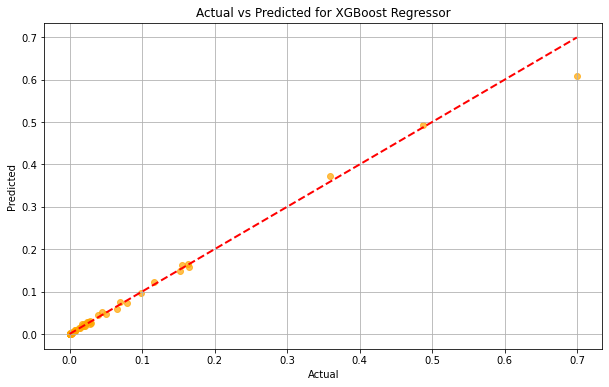

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted for Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, label='Decision Tree', color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for Decision Tree Regressor')
plt.grid(True)
plt.show()

# Plot actual vs predicted for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, label='Gradient Boosting', color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for Gradient Boosting Regressor')
plt.grid(True)
plt.show()

# Plot actual vs predicted for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, label='XGBoost', color='orange', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for XGBoost Regressor')
plt.grid(True)
plt.show()


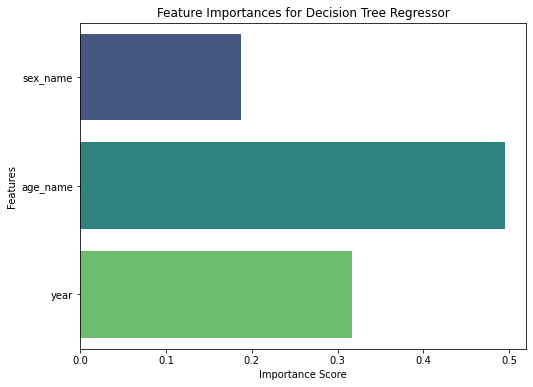

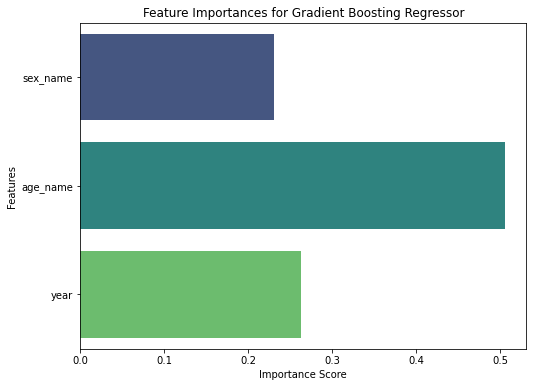

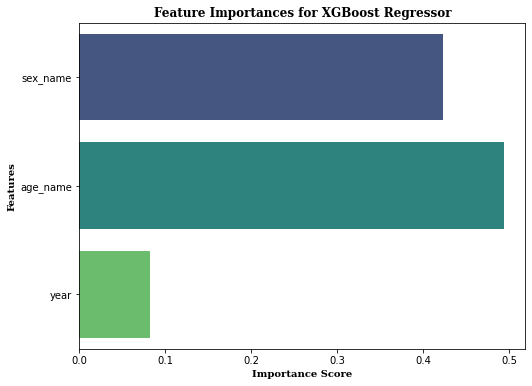

In [31]:
# Decision Tree feature importance
importances_dt = dt_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances_dt, y=features, palette='viridis')
plt.title('Feature Importances for Decision Tree Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Gradient Boosting feature importance
importances_gbr = gbr_model.feature_importances_

plt.figure(figsize=(8, 6))
sns.barplot(x=importances_gbr, y=features, palette='viridis')
plt.title('Feature Importances for Gradient Boosting Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# XGBoost feature importance
importances_xgb = xgb_model.feature_importances_

plt.figure(figsize=(8, 6))
sns.barplot(x=importances_xgb, y=features, palette='viridis')
plt.title('Feature Importances for XGBoost Regressor', fontsize=12, fontweight='bold', fontfamily='serif')
plt.xlabel('Importance Score', fontsize=10, fontweight='bold', fontfamily='serif')
plt.ylabel('Features', fontsize=10, fontweight='bold', fontfamily='serif')
plt.show()


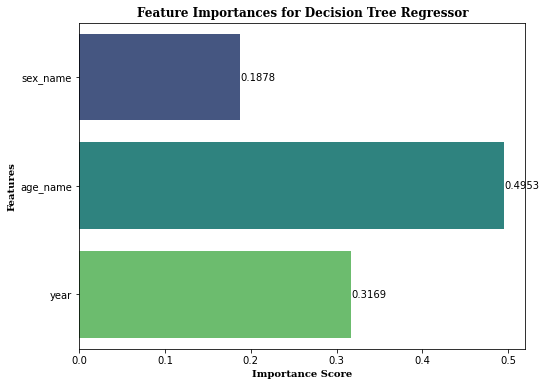

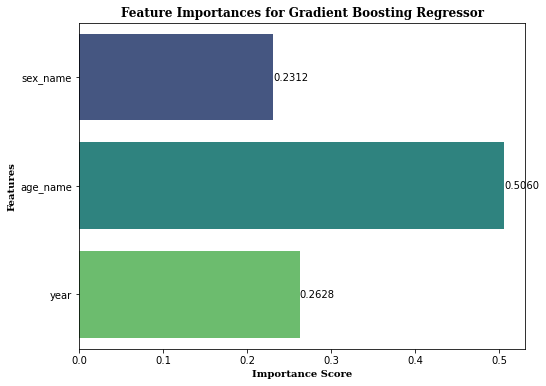

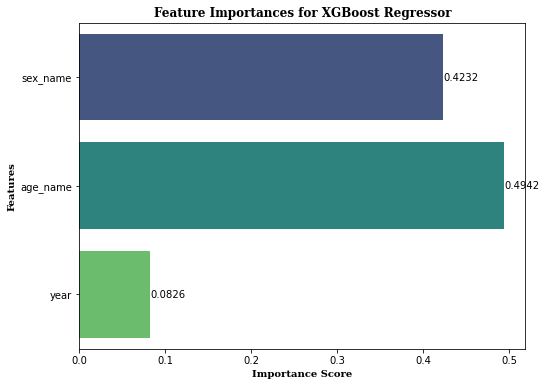

In [32]:
# Decision Tree feature importance
importances_dt = dt_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances_dt, y=features, palette='viridis')
plt.title('Feature Importances for Decision Tree Regressor', fontsize=12, fontweight='bold', fontfamily='serif')
plt.xlabel('Importance Score', fontsize=10, fontweight='bold', fontfamily='serif')
plt.ylabel('Features', fontsize=10, fontweight='bold', fontfamily='serif')

# Add annotations for the importance scores on the bars
for index, value in enumerate(importances_dt):
    plt.text(value, index, f'{value:.4f}', va='center', fontsize=10)

plt.show()

# Gradient Boosting feature importance
importances_gbr = gbr_model.feature_importances_

plt.figure(figsize=(8, 6))
sns.barplot(x=importances_gbr, y=features, palette='viridis')
plt.title('Feature Importances for Gradient Boosting Regressor', fontsize=12, fontweight='bold', fontfamily='serif')
plt.xlabel('Importance Score', fontsize=10, fontweight='bold', fontfamily='serif')
plt.ylabel('Features', fontsize=10, fontweight='bold', fontfamily='serif')

# Add annotations for the importance scores on the bars
for index, value in enumerate(importances_gbr):
    plt.text(value, index, f'{value:.4f}', va='center', fontsize=10)

plt.show()

# XGBoost feature importance
importances_xgb = xgb_model.feature_importances_

plt.figure(figsize=(8, 6))
sns.barplot(x=importances_xgb, y=features, palette='viridis')
plt.title('Feature Importances for XGBoost Regressor', fontsize=12, fontweight='bold', fontfamily='serif')
plt.xlabel('Importance Score', fontsize=10, fontweight='bold', fontfamily='serif')
plt.ylabel('Features', fontsize=10, fontweight='bold', fontfamily='serif')

# Add annotations for the importance scores on the bars
for index, value in enumerate(importances_xgb):
    plt.text(value, index, f'{value:.4f}', va='center', fontsize=10)

plt.show()


In [33]:
# Print a comparison of all models
print(f'''
Random Forest Regressor:    MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}
Decision Tree Regressor:    MAE: {mae_dt}, MSE: {mse_dt}, RMSE: {rmse_dt}, R²: {r2_dt}
Gradient Boosting Regressor: MAE: {mae_gbr}, MSE: {mse_gbr}, RMSE: {rmse_gbr}, R²: {r2_gbr}
XGBoost Regressor:          MAE: {mae_xgb}, MSE: {mse_xgb}, RMSE: {rmse_xgb}, R²: {r2_xgb}
''')


Random Forest Regressor:    MAE: 0.005138683209794911, MSE: 0.00027780472249506306, RMSE: 0.016667474988583696, R²: 0.9771430691590144
Decision Tree Regressor:    MAE: 0.0072090500579588684, MSE: 0.0005675149400322294, RMSE: 0.02382257207003957, R²: 0.9533065902586545
Gradient Boosting Regressor: MAE: 0.007044735730191706, MSE: 0.0004650833899407733, RMSE: 0.021565792124120395, R²: 0.9617343478408423
XGBoost Regressor:          MAE: 0.0030694764142760933, MSE: 0.000125503088811191, RMSE: 0.011202816110746038, R²: 0.9896739861168543



In [34]:
# Existing imports and data preprocessing code remains the same

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Base models
rf_model = RandomForestRegressor(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Stacking Regressor
estimators = [
    ('rf', rf_model),
    ('dt', dt_model),
    ('xgb', xgb_model)
]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_stack = stacking_model.predict(X_test)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
mse_stack = mean_squared_error(y_test, y_pred_stack)
rmse_stack = mse_stack ** 0.5
r2_stack = r2_score(y_test, y_pred_stack)

print(f'Stacking Regressor: MAE: {mae_stack}, MSE: {mse_stack}, RMSE: {rmse_stack}, R²: {r2_stack}')

Stacking Regressor: MAE: 0.004863895666864691, MSE: 0.0002240133243317576, RMSE: 0.014967074675158055, R²: 0.9815688624162923


In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select which scaler to use
scaler = StandardScaler()  # Use StandardScaler
# scaler = MinMaxScaler()  # Uncomment this line to try MinMaxScaler

# Scale the 'year' column
data_cleaned['year'] = scaler.fit_transform(data_cleaned[['year']])

# Define X (features) and y (target)
X = data_cleaned[['sex_name', 'age_name', 'year']]
y = data_cleaned['val']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models after scaling

# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt ** 0.5
r2_dt = r2_score(y_test, y_pred_dt)

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = mse_gbr ** 0.5
r2_gbr = r2_score(y_test, y_pred_gbr)

# XGBoost Regressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the comparison of model performance after scaling
print(f'''
After Scaling the 'year' column:
Random Forest Regressor:    MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}
Decision Tree Regressor:    MAE: {mae_dt}, MSE: {mse_dt}, RMSE: {rmse_dt}, R²: {r2_dt}
Gradient Boosting Regressor: MAE: {mae_gbr}, MSE: {mse_gbr}, RMSE: {rmse_gbr}, R²: {r2_gbr}
XGBoost Regressor:          MAE: {mae_xgb}, MSE: {mse_xgb}, RMSE: {rmse_xgb}, R²: {r2_xgb}
''')



After Scaling the 'year' column:
Random Forest Regressor:    MAE: 0.006939223149050318, MSE: 0.0004439652589414364, RMSE: 0.02107048312074112, R²: 0.9634718836732338
Decision Tree Regressor:    MAE: 0.007995698420472552, MSE: 0.0007571489937458669, RMSE: 0.027516340486079663, R²: 0.9377040748949879
Gradient Boosting Regressor: MAE: 0.007044735730191706, MSE: 0.0004650833899407733, RMSE: 0.021565792124120395, R²: 0.9617343478408423
XGBoost Regressor:          MAE: 0.0030694764142760933, MSE: 0.000125503088811191, RMSE: 0.011202816110746038, R²: 0.9896739861168543



In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grids for each model

# Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting
gbr_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}

# XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Initialize the models
rf = RandomForestRegressor(random_state=42)
dt = DecisionTreeRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Choose whether to use GridSearchCV or RandomizedSearchCV
# Use RandomizedSearchCV to reduce computation time
grid_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid, n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42)
grid_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=dt_param_grid, n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42)
grid_search_gbr = RandomizedSearchCV(estimator=gbr, param_distributions=gbr_param_grid, n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42)
grid_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_grid, n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit the models with hyperparameter tuning
grid_search_rf.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)
grid_search_gbr.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)

# Get the best models
best_rf = grid_search_rf.best_estimator_
best_dt = grid_search_dt.best_estimator_
best_gbr = grid_search_gbr.best_estimator_
best_xgb = grid_search_xgb.best_estimator_

# Make predictions using the best models
y_pred_rf = best_rf.predict(X_test)
y_pred_dt = best_dt.predict(X_test)
y_pred_gbr = best_gbr.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the models
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt ** 0.5
r2_dt = r2_score(y_test, y_pred_dt)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = mse_gbr ** 0.5
r2_gbr = r2_score(y_test, y_pred_gbr)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the comparison of model performance after hyperparameter tuning
print(f'''
After Hyperparameter Tuning:
Random Forest Regressor:    MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}
Decision Tree Regressor:    MAE: {mae_dt}, MSE: {mse_dt}, RMSE: {rmse_dt}, R²: {r2_dt}
Gradient Boosting Regressor: MAE: {mae_gbr}, MSE: {mse_gbr}, RMSE: {rmse_gbr}, R²: {r2_gbr}
XGBoost Regressor:          MAE: {mae_xgb}, MSE: {mse_xgb}, RMSE: {rmse_xgb}, R²: {r2_xgb}
''')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits

After Hyperparameter Tuning:
Random Forest Regressor:    MAE: 0.005171276494689784, MSE: 0.00027763464115438346, RMSE: 0.016662372014643757, R²: 0.9771570629363927
Decision Tree Regressor:    MAE: 0.00903213209370535, MSE: 0.0009558174680976315, RMSE: 0.030916297774760022, R²: 0.9213582347747822
Gradient Boosting Regressor: MAE: 0.0024277909568699596, MSE: 5.655693060335608e-05, RMSE: 0.00752043420311328, R²: 0.9953466671128951
XGBoost Regressor:          MAE: 0.00233925395685725, MSE: 5.7230524106169806e-05, RMSE: 0.007565085862445304, R²: 0.9952912458804175



In [36]:
########### Trying out the GridSearch 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define parameter grids for each model

# Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting
gbr_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}

# XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Initialize the models
rf = RandomForestRegressor(random_state=42)
dt = DecisionTreeRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Set up GridSearchCV for each model
grid_search_rf = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=gbr_param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the models with hyperparameter tuning
grid_search_rf.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)
grid_search_gbr.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)

# Get the best models
best_rf = grid_search_rf.best_estimator_
best_dt = grid_search_dt.best_estimator_
best_gbr = grid_search_gbr.best_estimator_
best_xgb = grid_search_xgb.best_estimator_

# Make predictions using the best models
y_pred_rf = best_rf.predict(X_test)
y_pred_dt = best_dt.predict(X_test)
y_pred_gbr = best_gbr.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the models
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt ** 0.5
r2_dt = r2_score(y_test, y_pred_dt)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = mse_gbr ** 0.5
r2_gbr = r2_score(y_test, y_pred_gbr)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the comparison of model performance after hyperparameter tuning
print(f'''
After Hyperparameter Tuning:
Random Forest Regressor:    MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}
Decision Tree Regressor:    MAE: {mae_dt}, MSE: {mse_dt}, RMSE: {rmse_dt}, R²: {r2_dt}
Gradient Boosting Regressor: MAE: {mae_gbr}, MSE: {mse_gbr}, RMSE: {rmse_gbr}, R²: {r2_gbr}
XGBoost Regressor:          MAE: {mae_xgb}, MSE: {mse_xgb}, RMSE: {rmse_xgb}, R²: {r2_xgb}
''')


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits

After Hyperparameter Tuning:
Random Forest Regressor:    MAE: 0.005171276494689784, MSE: 0.00027763464115438346, RMSE: 0.016662372014643757, R²: 0.9771570629363927
Decision Tree Regressor:    MAE: 0.0072090500579588684, MSE: 0.0005675149400322294, RMSE: 0.02382257207003957, R²: 0.9533065902586545
Gradient Boosting Regressor: MAE: 0.00262683886505004, MSE: 6.12777333628825e-05, RMSE: 0.007828009540290717, R²: 0.994958253765493
XGBoost Regressor:          MAE: 0.001906805025982678, MSE: 2.0991298816876644e-05, RMSE: 0.004581626219681899, R²: 0.9982728995352902



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the predicted values from all four models
models = ['Random Forest', 'Decision Tree', 'Gradient Boosting', 'XGBoost']
y_preds = [y_pred_rf, y_pred_dt, y_pred_gbr, y_pred_xgb]
y_tests = [y_test, y_test, y_test, y_test]  # Same test set for all models

# Create a 2x2 grid for plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Models Actual vs Predicted Values for Probability of Death Predictions', fontsize=12, fontweight='bold')

# Flatten the 2x2 grid for easier access to the axes
axes = axes.flatten()

# Iterate over each model and plot actual vs predicted
for i, model in enumerate(models):
    sns.scatterplot(x=y_tests[i], y=y_preds[i], ax=axes[i], color='b', label='Predicted')
    axes[i].plot([min(y_tests[i]), max(y_tests[i])], [min(y_tests[i]), max(y_tests[i])], color='r', linestyle='--', label='Perfect Prediction')
    axes[i].set_title(f'{model}', fontsize=10, fontweight='bold')
    axes[i].set_xlabel('Actual Values', fontsize=12)
    axes[i].set_ylabel('Predicted Values', fontsize=12)
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

NameError: name 'y_pred_rf' is not defined

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Assuming 'data_cleaned' is your cleaned dataset
# Define X (features) and y (target)
X = data_cleaned[['sex_name', 'age_name', 'year']]
y = data_cleaned['val']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
xgb_model = XGBRegressor()
gbr_model = GradientBoostingRegressor()

# Define hyperparameter grids for both models
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

param_grid_gbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
}

# Set up GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Best XGBoost model
best_xgb = grid_search_xgb.best_estimator_
print("Best XGBoost Parameters:", grid_search_xgb.best_params_)

# Set up GridSearchCV for Gradient Boosting
grid_search_gbr = GridSearchCV(estimator=gbr_model, param_grid=param_grid_gbr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gbr.fit(X_train, y_train)

# Best Gradient Boosting model
best_gbr = grid_search_gbr.best_estimator_
print("Best Gradient Boosting Parameters:", grid_search_gbr.best_params_)

# Create the Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[('xgb', best_xgb), ('gbr', best_gbr)],
    final_estimator=GradientBoostingRegressor()  # You can also use XGBRegressor or another model here
)

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred = stacking_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Stacking Model: MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}')


Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Stacking Model: MAE: 0.006016255023114649, MSE: 0.0006976583907690378, RMSE: 0.02641322378599473, R²: 0.9425987814561914


In [33]:
pip install lightgbm catboost


Note: you may need to restart the kernel to use updated packages.


In [37]:
from catboost import CatBoostRegressor

# Prepare the CatBoost model
model_cat = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=0)

# Fit the model
model_cat.fit(X_train, y_train)

# Make predictions
y_pred_cat = model_cat.predict(X_test)

# Evaluate the model
mae_cat = mean_absolute_error(y_test, y_pred_cat)
mse_cat = mean_squared_error(y_test, y_pred_cat)
rmse_cat = mse_cat ** 0.5
r2_cat = r2_score(y_test, y_pred_cat)

# Print the results
print(f'''
CatBoost:
MAE: {mae_cat}, MSE: {mse_cat}, RMSE: {rmse_cat}, R²: {r2_cat}
''')


CatBoost:
MAE: 0.0024986188817379597, MSE: 4.0551237716876794e-05, RMSE: 0.006367985373481694, R²: 0.9966635670276358



In [39]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Prepare your data (assuming you already have your features and target defined)
X = data_cleaned[['sex_name', 'age_name', 'year']]
y = data_cleaned['val']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define the CatBoost model
model_cat = CatBoostRegressor(verbose=0)

# Set up the parameter grid
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'boosting_type': ['Plain', 'Ordered']
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model_cat, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best model
best_model_cat = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_cat = best_model_cat.predict(X_test)

# Evaluate the best model
mae_best_cat = mean_absolute_error(y_test, y_pred_best_cat)
mse_best_cat = mean_squared_error(y_test, y_pred_best_cat)
rmse_best_cat = mse_best_cat ** 0.5
r2_best_cat = r2_score(y_test, y_pred_best_cat)

# Print the results
print(f'''
Best Hyperparameters: {grid_search.best_params_}
CatBoost Performance:
MAE: {mae_best_cat}, MSE: {mse_best_cat}, RMSE: {rmse_best_cat}, R²: {r2_best_cat}
''')

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Hyperparameters: {'boosting_type': 'Plain', 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.05}
CatBoost Performance:
MAE: 0.002203084212729252, MSE: 3.20759909600499e-05, RMSE: 0.005663566982039667, R²: 0.9973608846514732



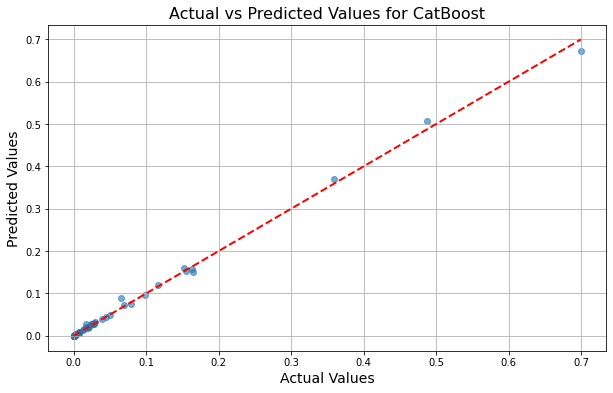

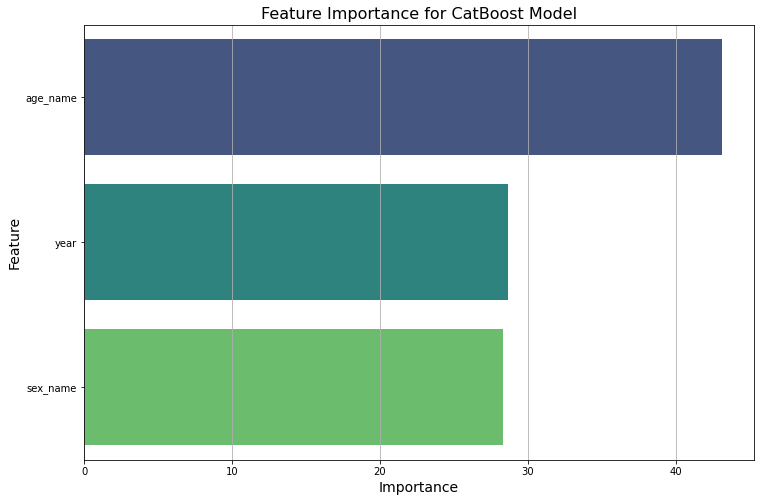

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize Actual vs. Predicted

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_cat, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.title('Actual vs Predicted Values for CatBoost', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.grid()
plt.show()

# 2. Visualize Feature Importance

# Get feature importance
feature_importance = best_model_cat.get_feature_importance()
features = X_encoded.columns

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance for CatBoost Model', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(axis='x')
plt.show()


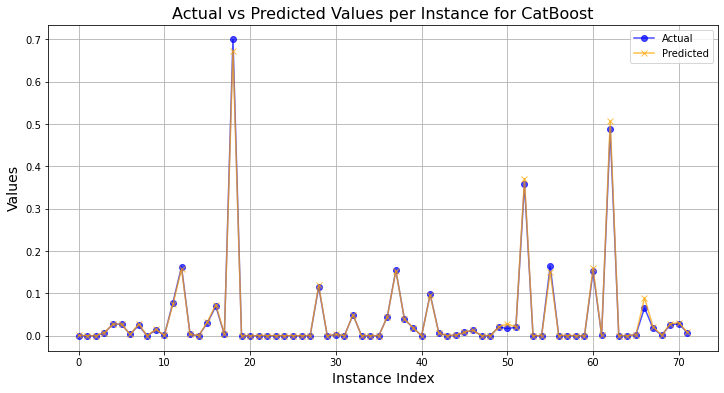

In [41]:
# Combine actual and predicted values into a DataFrame
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best_cat})

# Reset the index for proper plotting
results_df.reset_index(drop=True, inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(results_df['Actual'], label='Actual', marker='o', color='blue', alpha=0.7)
plt.plot(results_df['Predicted'], label='Predicted', marker='x', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Values per Instance for CatBoost', fontsize=16)
plt.xlabel('Instance Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [51]:
######## ENSEMBLE TRIAL 

In [52]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np


In [53]:
# Prepare your data
X = data_cleaned[['sex_name', 'age_name', 'year']]
y = data_cleaned['val']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [54]:
# Define the CatBoost model
model_cat = CatBoostRegressor(verbose=0)

# Set up the parameter grid for CatBoost
param_grid_cat = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'boosting_type': ['Plain', 'Ordered']
}

# Perform Grid Search for CatBoost
grid_search_cat = GridSearchCV(estimator=model_cat, 
                                param_grid=param_grid_cat, 
                                scoring='neg_mean_squared_error', 
                                cv=5, 
                                verbose=1, 
                                n_jobs=-1)

grid_search_cat.fit(X_train, y_train)

# Best CatBoost model
best_model_cat = grid_search_cat.best_estimator_

# Define the XGBoost model
model_xgb = XGBRegressor()

# Set up the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0]
}

# Perform Grid Search for XGBoost
grid_search_xgb = GridSearchCV(estimator=model_xgb, 
                                param_grid=param_grid_xgb, 
                                scoring='neg_mean_squared_error', 
                                cv=5, 
                                verbose=1, 
                                n_jobs=-1)

grid_search_xgb.fit(X_train, y_train)

# Best XGBoost model
best_model_xgb = grid_search_xgb.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [55]:
# Make predictions with the best models
y_pred_cat = best_model_cat.predict(X_test)
y_pred_xgb = best_model_xgb.predict(X_test)

# Average predictions
y_pred_ensemble = (y_pred_cat + y_pred_xgb) / 2

In [56]:
# Evaluate the ensemble model
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = mse_ensemble ** 0.5
r2_ensemble = r2_score(y_test, y_pred_ensemble)

# Print the results
print(f'''
Ensemble CatBoost and XGBoost Performance:
MAE: {mae_ensemble}, MSE: {mse_ensemble}, RMSE: {rmse_ensemble}, R²: {r2_ensemble}
''')


Ensemble CatBoost and XGBoost Performance:
MAE: 0.0021145797049894935, MSE: 3.396021425103088e-05, RMSE: 0.005827539296395253, R²: 0.997205856468136



In [50]:
############################################# POOR PERFORMING MODELS #########################################

In [42]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Prepare the SVM model with scaling
svm_model = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

# Fit the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = mse_svm ** 0.5
r2_svm = r2_score(y_test, y_pred_svm)

# Print the results
print(f'''
SVM Performance:
MAE: {mae_svm}, MSE: {mse_svm}, RMSE: {rmse_svm}, R²: {r2_svm}
''')



SVM Performance:
MAE: 0.058898050790691575, MSE: 0.0041961818152530545, RMSE: 0.06477794235118196, R²: 0.6547508743335165



In [43]:
from sklearn.linear_model import LinearRegression

# Prepare the Linear Regression model
lin_reg_model = LinearRegression()

# Fit the model
lin_reg_model.fit(X_train, y_train)

# Make predictions
y_pred_lin_reg = lin_reg_model.predict(X_test)

# Evaluate the model
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
rmse_lin_reg = mse_lin_reg ** 0.5
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

# Print the results
print(f'''
Linear Regression Performance:
MAE: {mae_lin_reg}, MSE: {mse_lin_reg}, RMSE: {rmse_lin_reg}, R²: {r2_lin_reg}
''')


Linear Regression Performance:
MAE: 0.06522765242994723, MSE: 0.009019734034088726, RMSE: 0.09497228034583947, R²: 0.25788361274198945



In [44]:
from sklearn.neighbors import KNeighborsRegressor

# Prepare the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mse_knn ** 0.5
r2_knn = r2_score(y_test, y_pred_knn)

# Print the results
print(f'''
KNN Performance:
MAE: {mae_knn}, MSE: {mse_knn}, RMSE: {rmse_knn}, R²: {r2_knn}
''')


KNN Performance:
MAE: 0.014909885133385821, MSE: 0.0026041817397712223, RMSE: 0.05103118399342918, R²: 0.7857358169123051



In [45]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # line for perfect prediction
    plt.title(f'Actual vs Predicted Values ({model_name})')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid()
    plt.show()


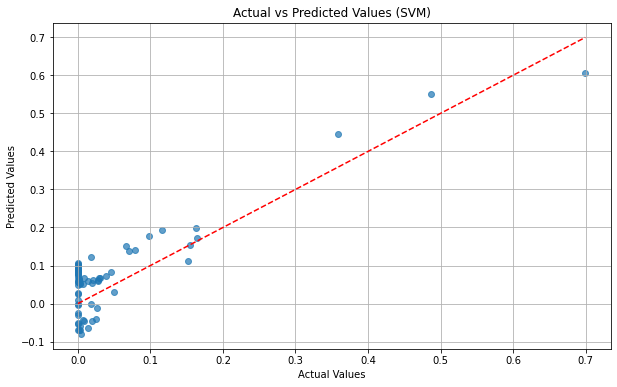

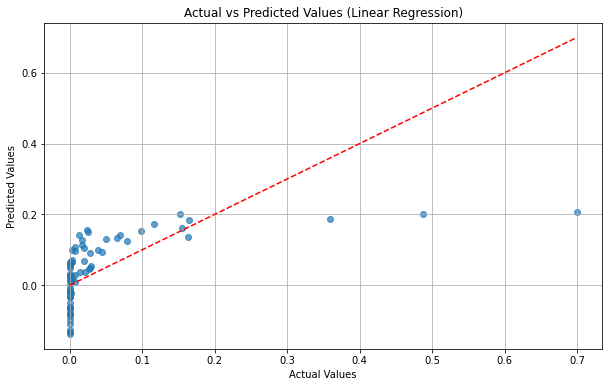

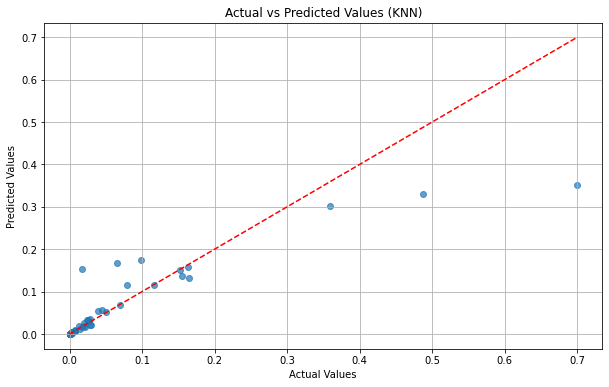

In [46]:
# Fit and evaluate models (SVM, Linear Regression, KNN)
# ... (include the previously provided model fitting code here)

# Plot actual vs predicted for SVM
plot_actual_vs_predicted(y_test, y_pred_svm, 'SVM')

# Plot actual vs predicted for Linear Regression
plot_actual_vs_predicted(y_test, y_pred_lin_reg, 'Linear Regression')

# Plot actual vs predicted for KNN
plot_actual_vs_predicted(y_test, y_pred_knn, 'KNN')

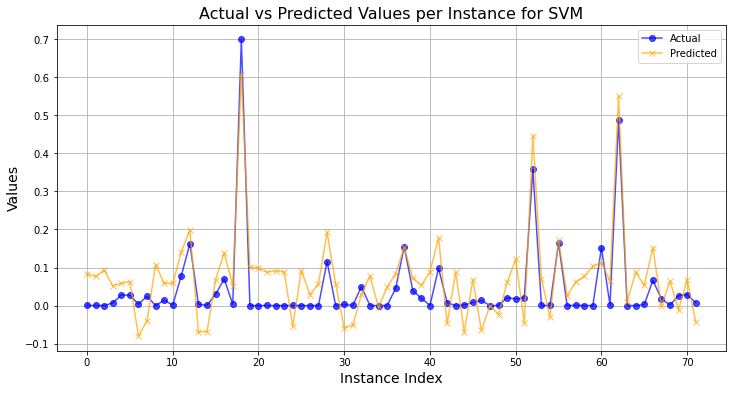

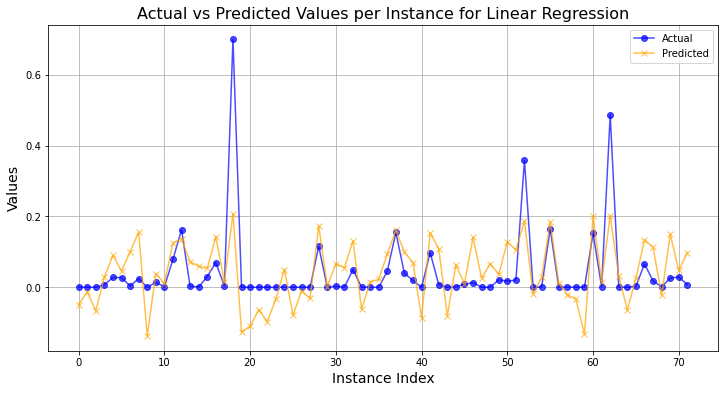

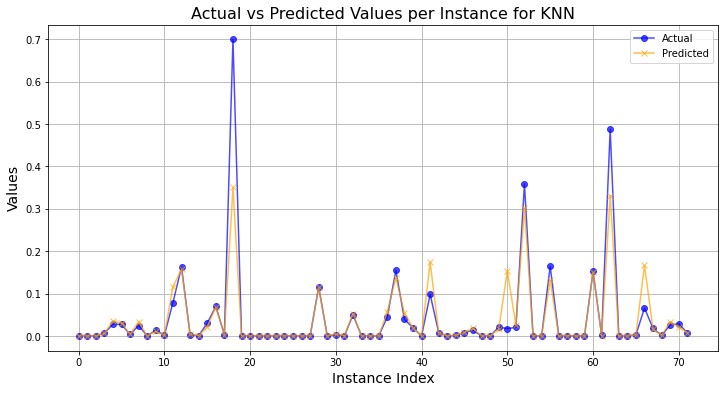

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine actual and predicted values for SVM
results_df_svm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svm})
results_df_svm.reset_index(drop=True, inplace=True)

# Plotting for SVM
plt.figure(figsize=(12, 6))
plt.plot(results_df_svm['Actual'], label='Actual', marker='o', color='blue', alpha=0.7)
plt.plot(results_df_svm['Predicted'], label='Predicted', marker='x', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Values per Instance for SVM', fontsize=16)
plt.xlabel('Instance Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# Combine actual and predicted values for Linear Regression
results_df_lin_reg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lin_reg})
results_df_lin_reg.reset_index(drop=True, inplace=True)

# Plotting for Linear Regression
plt.figure(figsize=(12, 6))
plt.plot(results_df_lin_reg['Actual'], label='Actual', marker='o', color='blue', alpha=0.7)
plt.plot(results_df_lin_reg['Predicted'], label='Predicted', marker='x', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Values per Instance for Linear Regression', fontsize=16)
plt.xlabel('Instance Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# Combine actual and predicted values for KNN
results_df_knn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})
results_df_knn.reset_index(drop=True, inplace=True)

# Plotting for KNN
plt.figure(figsize=(12, 6))
plt.plot(results_df_knn['Actual'], label='Actual', marker='o', color='blue', alpha=0.7)
plt.plot(results_df_knn['Predicted'], label='Predicted', marker='x', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Values per Instance for KNN', fontsize=16)
plt.xlabel('Instance Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend()
plt.grid()
plt.show()